## 04EPPY - Actividad 2 - Veronika Prokopchuk


### A1 - Leer Datasets - 10%

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import csv

In [3]:
root_path = os.path.join("res")

athlete_events = pd.read_csv(os.path.join(root_path, "athlete_events.csv"), sep=',',
                                index_col=0, header=0, engine='python', na_values='?')

noc_regions = pd.read_csv(os.path.join(root_path, "noc_regions.csv"), sep=',',
                                index_col=0, header=0, engine='python', na_values='?')
                                
results = pd.read_csv(os.path.join(root_path, "results.csv"), sep=',', index_col=0, 
                                names = ['Gender','Event','Location','Year','Medal','Name','Nationality','Result','Additional'], 
                                engine='python', na_values='?', skiprows=[0])


In [5]:
athlete_events.sample(10)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
113106,Song Chaoqing,F,22.0,170.0,60.0,China,CHN,2014 Winter,2014,Winter,Sochi,Biathlon,Biathlon Women's 7.5 kilometres Sprint,NaN
48107,Luis Alberto Hernando Alzaga,M,28.0,184.0,73.0,Spain,ESP,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
78213,Dominik Meichtry,M,23.0,183.0,74.0,Switzerland,SUI,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 100 metres Freestyle,NaN
123716,Paiboon Vacharapan,M,26.0,172.0,60.0,Thailand,THA,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
56826,Irina Nikolayevna Kalentyeva,F,38.0,155.0,45.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Mountainbike, Cross-Country",NaN
74084,Bronisaw Malinowski,M,29.0,182.0,68.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 3,000 metres Steeplechase",Gold
73386,Eugene Magee,M,30.0,177.0,83.0,Ireland,IRL,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,NaN
20365,Cheng Hsin-Fu,M,23.0,172.0,70.0,Chinese Taipei,TPE,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
89388,Diego Ordez Arcauz,M,24.0,NaN,NaN,Spain,ESP,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 4 x 100 metres Relay,NaN


In [6]:
noc_regions.sample(10)

,region,notes
NOC,,
GUA,Guatemala,NaN
SVK,Slovakia,NaN
SAA,Germany,NaN
GUY,Guyana,NaN
IRL,Ireland,NaN
IRQ,Iraq,NaN
BOT,Botswana,NaN
GRN,Grenada,NaN
BLR,Belarus,NaN


In [7]:
results.sample(10)


,Event,Location,Year,Medal,Name,Nationality,Result,Additional
Gender,,,,,,,,
W,Hammer Throw Women,Athens,2004,S,Yipsi MORENO,CUB,73.36,NaN
M,800M Men,Melbourne / Stockholm,1956,G,Thomas COURTNEY,USA,1:47.7,NaN
M,400M Hurdles Men,Munich,1972,B,David HEMERY,GBR,48.52,NaN
W,4X100M Relay Women,Beijing,2008,B,NaN,BRA,43.14,NaN
M,1500M Men,Athens,2004,B,Rui SILVA,POR,3:34.68,NaN
M,Shot Put Men,Atlanta,1996,S,John GODINA,USA,20.79,NaN
M,1500M Men,Helsinki,1952,S,Robert MCMILLEN,USA,3:45.2,NaN
M,Marathon Men,Helsinki,1952,G,Emil ZÃTOPEK,TCH,2:23:03.2,NaN
W,4X100M Relay Women,Los Angeles,1932,G,NaN,USA,47.0,NaN


### A2 - Análisis - 45%

,Year,NumberSports
0,1896,9
1,1900,20
2,1904,18
3,1906,13
4,1908,24
5,1912,17
6,1920,25
7,1924,20
8,1928,17
9,1932,18


<Axes: xlabel='Year', ylabel='NumberSports'>

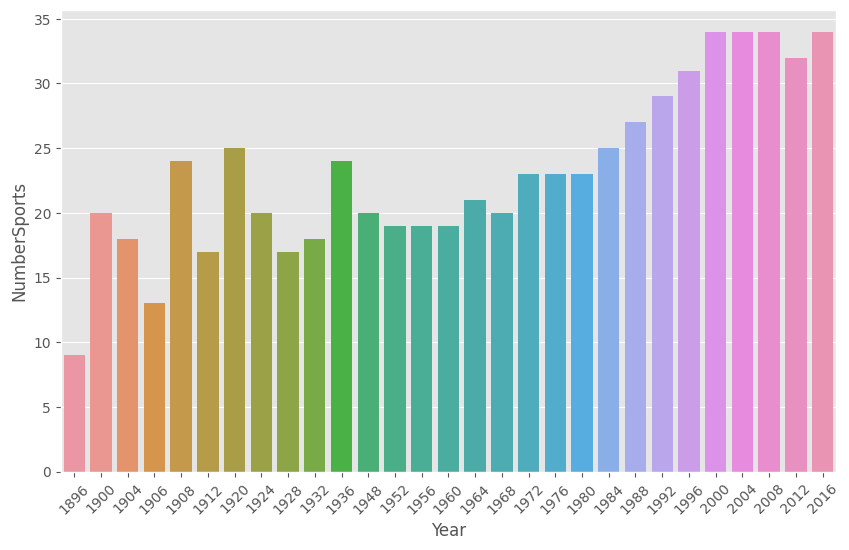

In [102]:
# Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
#datos
data_years_sports = athlete_events.copy()
data_years_sports.drop(data_years_sports[data_years_sports["Season"] == "Winter"].index, inplace = True)
data_years_sports = data_years_sports[['Sport', 'Year']].drop_duplicates()

df_years_sports = data_years_sports.pivot_table(index=['Year'], aggfunc='size')
df_years_sports = df_years_sports.reset_index()
df_years_sports.columns = ['Year','NumberSports']
display(df_years_sports)

#grafico
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data=df_years_sports, x='Year',y='NumberSports')


Sex,F,M
Year,,
1896,0,176
1900,23,1197
1904,6,644
1906,6,835
1908,44,1980
1912,53,2354
1920,73,2568
1924,156,3090
1928,312,2923


Text(0, 0.5, 'Number of athletes')

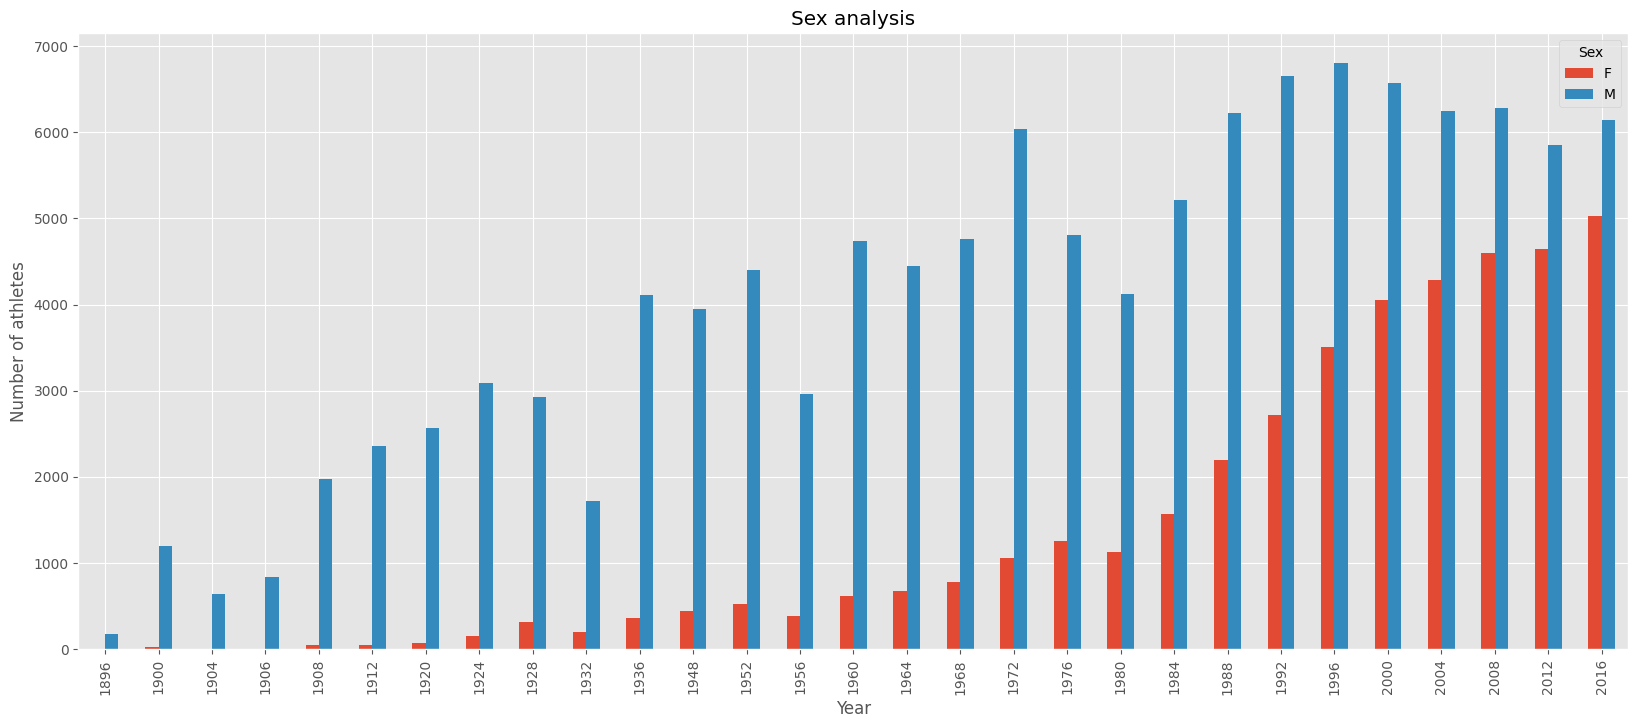

In [101]:
#Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
#datos
data_years_sex = athlete_events.copy()
data_years_sex.drop(data_years_sex[data_years_sex["Season"] == "Winter"].index, inplace = True)
data_years_sex = data_years_sex[['Sex', 'Year','Name']].drop_duplicates().drop(['Name'], axis=1)
data_years_sex = pd.pivot_table(data_years_sex,index=['Year'], columns=['Sex'], aggfunc='size', fill_value=0)
data_years_sex.index.name = 'Year'
display(data_years_sex)
#grafico
plt.style.use('ggplot')
data_years_sex.plot.bar(figsize=(20,8))
plt.title("Sex analysis")
plt.xlabel("Year")
plt.ylabel("Number of athletes")


In [33]:
#Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais

data_medal_country = athlete_events.copy()
medals = ['Gold','Silver','Bronze']
data_medal_country = data_medal_country.loc[data_medal_country['Medal'].isin(medals)]
data_medal_country = data_medal_country.loc[data_medal_country['Season'] == "Summer"]

display(data_medal_country)


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [34]:
data_medal_country = data_medal_country.replace({'Medal' : {"Gold" : 1, "Silver" : 1, "Bronze" : 1}})
data_medal_country.drop(['Age','Height','Weight','Sport','Name','Sex','Games','Year','Season','City','Event','NOC'], axis=1, inplace=True)
display(data_medal_country)

,Team,Medal
ID,,
4,Denmark/Sweden,1
15,Finland,1
15,Finland,1
17,Finland,1
17,Finland,1
...,...,...
135553,Soviet Union,1
135553,Soviet Union,1
135554,Poland,1


In [36]:
pivot = data_medal_country.pivot_table(data_medal_country,index=['Team'], aggfunc ='sum')
pivot = pivot.sort_values('Medal', ascending=False)
pivot = pivot.reset_index()
pivot.drop(pivot.index[50:], inplace=True)
display(pivot)

,Team,Medal
0,United States,4686
1,Soviet Union,2061
2,Germany,1687
3,Great Britain,1598
4,France,1408
5,Italy,1384
6,Australia,1290
7,Hungary,1123
8,Sweden,1006
9,Russia,894


Text(0.5, 0, 'Total')

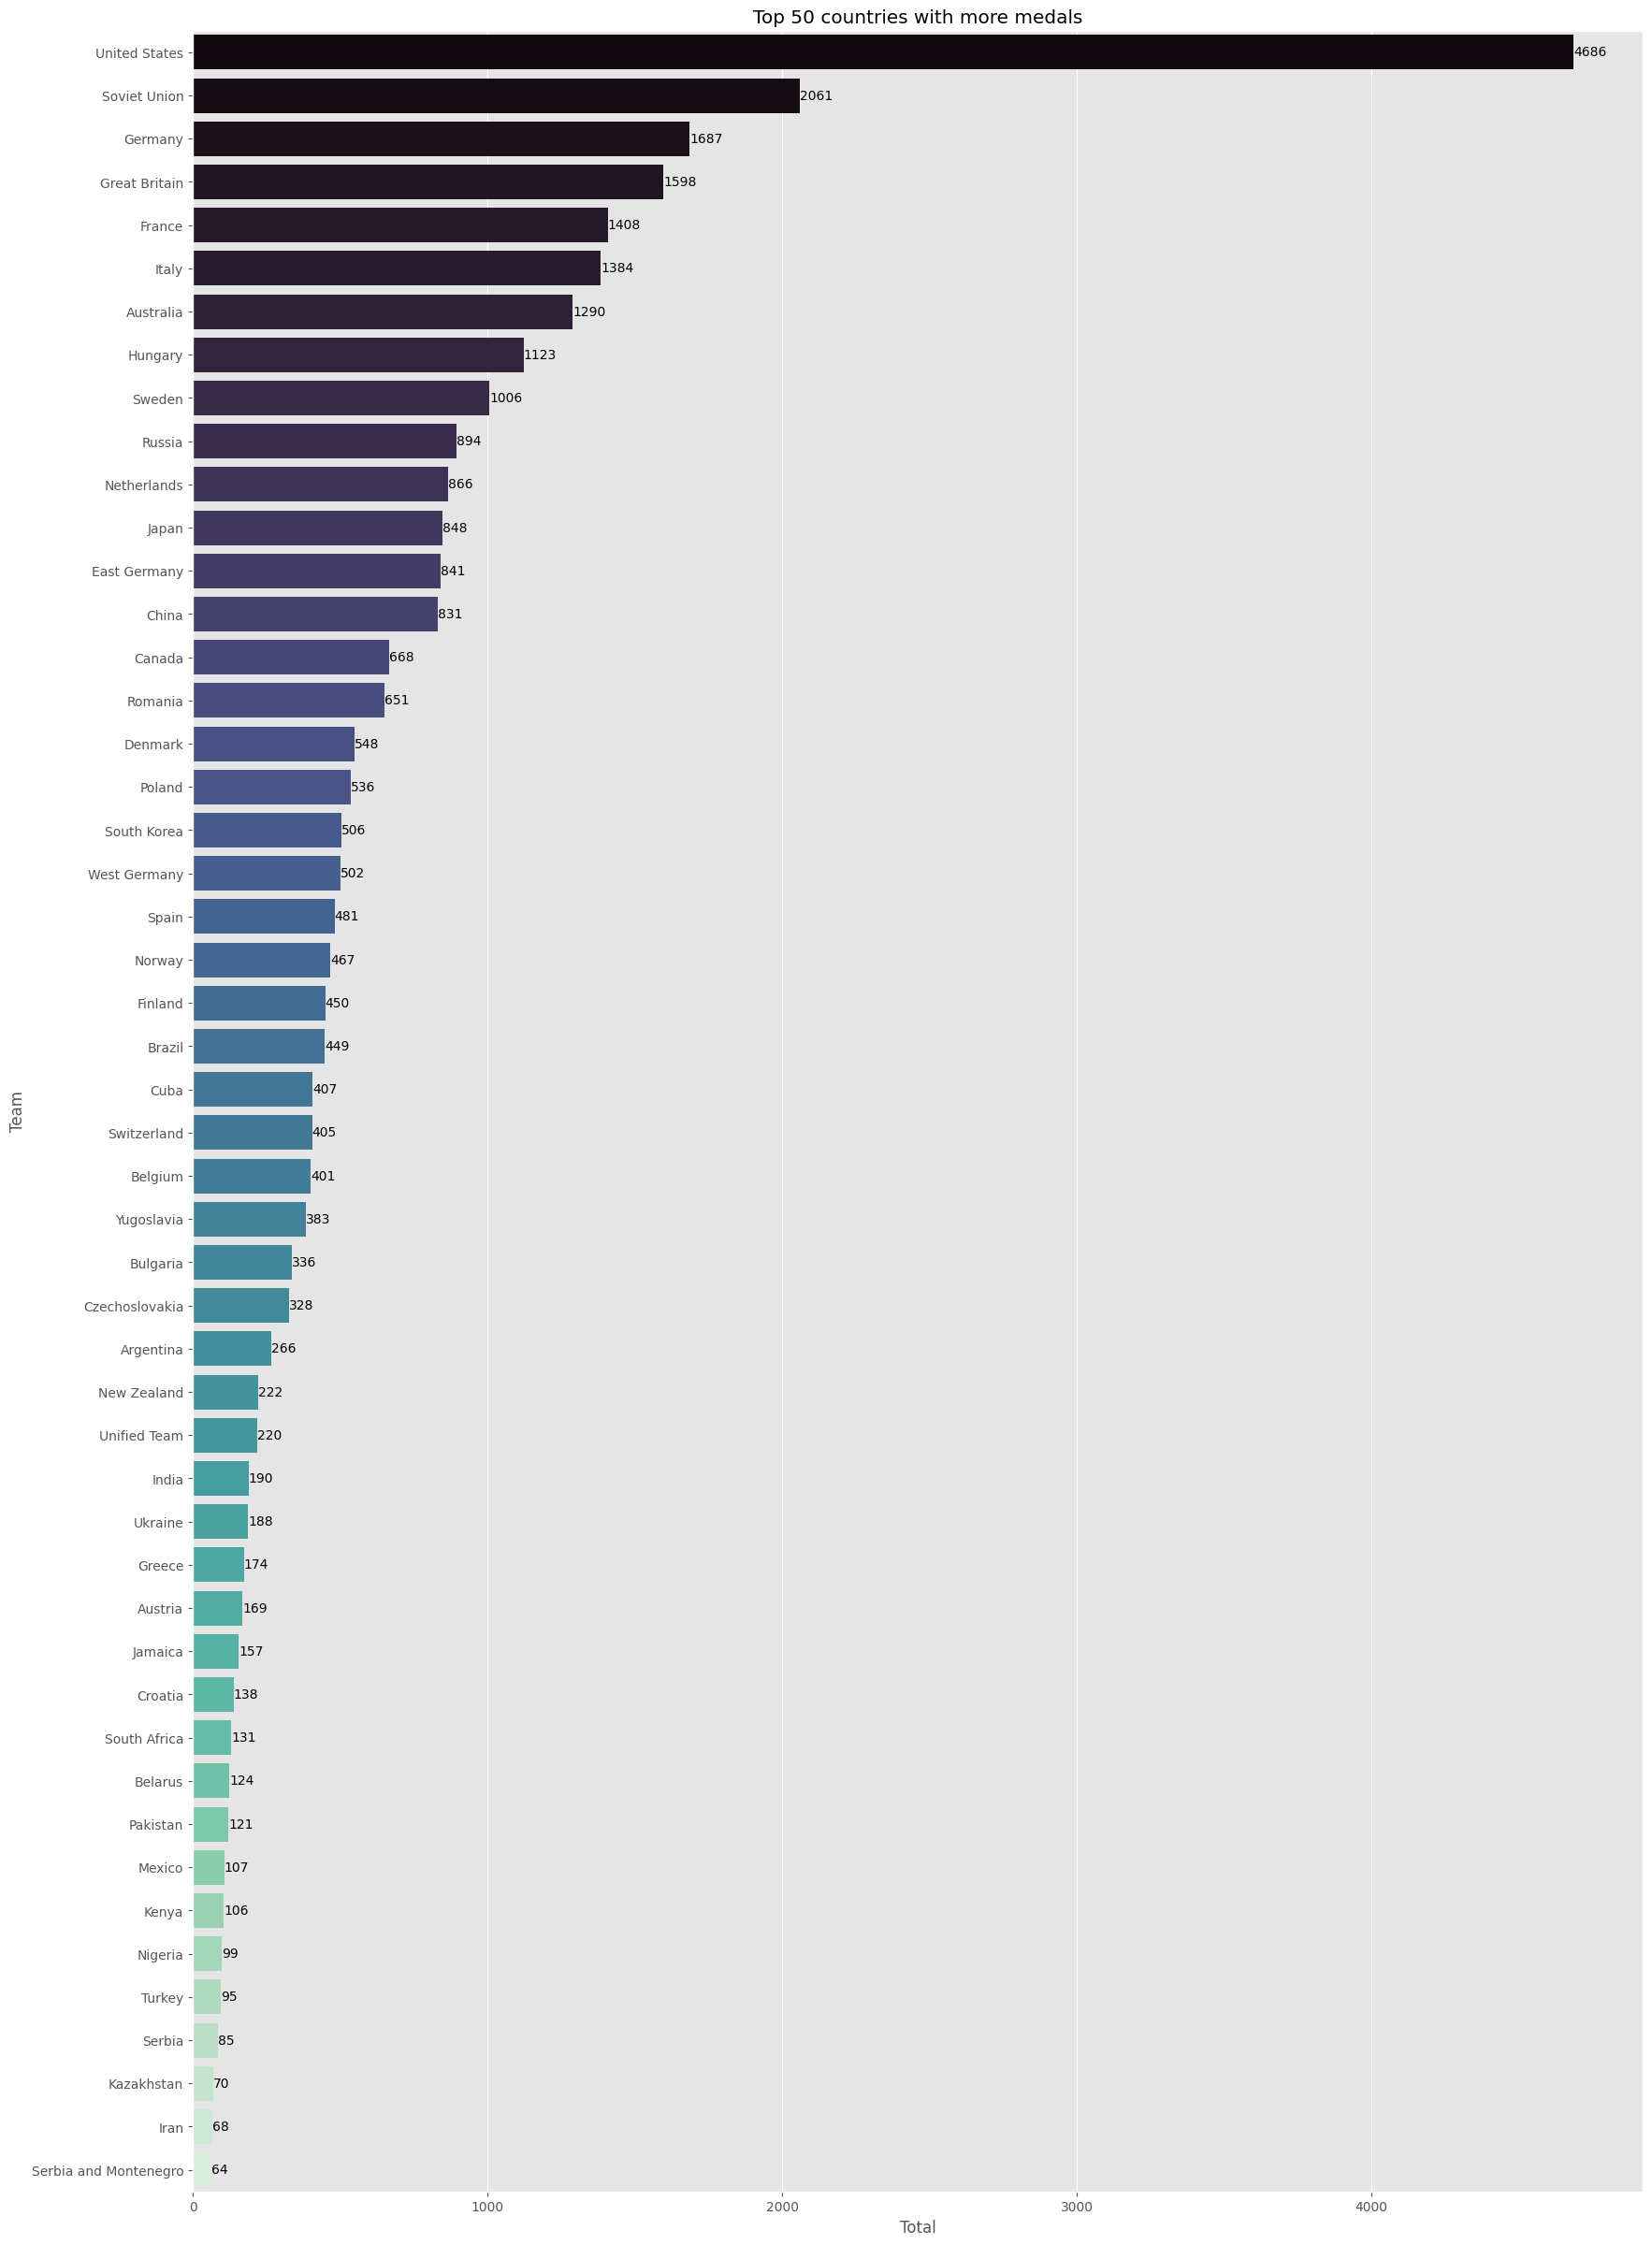

In [61]:
#grafico
plt.figure(figsize=(20,30))

ax = sns.barplot(data=pivot, x="Medal", y="Team", palette="mako")
ax.bar_label(ax.containers[0])
plt.title('Top 50 countries with more medals')
plt.ylabel('Team')
plt.xlabel('Total')


### A3 - Machine Learning - 45%

In [62]:
#obtencion de datos en la prueba de los 100 metros lisos
data_results = results.loc[(results['Event'] == '100M Men') | (results['Event'] == '100M Women')].copy()
display(data_results)
data_results.sample(10)
data_results.isnull().sum()

,Event,Location,Year,Medal,Name,Nationality,Result,Additional
Gender,,,,,,,,
M,100M Men,Rio,2016,G,Usain BOLT,JAM,9.81,NaN
M,100M Men,Rio,2016,S,Justin GATLIN,USA,9.89,NaN
M,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,9.91,NaN
M,100M Men,Beijing,2008,G,Usain BOLT,JAM,9.69,NaN
M,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,9.89,NaN
...,...,...,...,...,...,...,...,...
W,100M Women,London,1948,S,Dorothy HALL,GBR,12.2,NaN
W,100M Women,London,1948,B,Shirley STRICKLAND,AUS,12.2,NaN
W,100M Women,Los Angeles,1932,G,Stanislawa WALASIEWICZ,POL,11.9,NaN


Event            0
Location         0
Year             0
Medal            0
Name             0
Nationality      0
Result           0
Additional     142
dtype: int64

In [63]:
#preparando para merge
data_athlete_events = athlete_events.loc[(athlete_events['Event'] == "Athletics Men's 100 metres") | (athlete_events['Event'] == "Athletics Women's 100 metres")].copy()
data_athlete_events = data_athlete_events.replace({'Event' : {"Athletics Men's 100 metres" : "100M Men", "Athletics Women's 100 metres" : "100M Women"}})
data_athlete_events = data_athlete_events.replace({'Medal' : {"Gold" : "G", "Silver" : "S","Bronze" : "B"}})
data_athlete_events.sample(20)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
45142,Raili Karin Helena Halttu (-Renkonen),F,27.0,165.0,54.0,Finland,FIN,1936 Summer,1936,Summer,Berlin,Athletics,100M Women,NaN
83247,Fernando Muagorri Alcorta,M,20.0,NaN,NaN,Spain,ESP,1928 Summer,1928,Summer,Amsterdam,Athletics,100M Men,NaN
43750,Needy Guims,M,21.0,187.0,81.0,France,FRA,1996 Summer,1996,Summer,Atlanta,Athletics,100M Men,NaN
110381,Ptur Fririk Sigursson,M,23.0,NaN,NaN,Iceland,ISL,1952 Summer,1952,Summer,Helsinki,Athletics,100M Men,NaN
28679,Grace Ann Dinkins,F,34.0,170.0,54.0,Liberia,LBR,2000 Summer,2000,Summer,Sydney,Athletics,100M Women,NaN
131098,Marie-Ange Wirtz,F,21.0,162.0,48.0,Seychelles,SEY,1984 Summer,1984,Summer,Los Angeles,Athletics,100M Women,NaN
101567,Julie Rocheleau-Baumann,F,24.0,165.0,56.0,Canada,CAN,1988 Summer,1988,Summer,Seoul,Athletics,100M Women,NaN
37936,Melinda Maree Gainsford-Taylor,F,28.0,172.0,67.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Athletics,100M Women,NaN
6336,Masoud Azizi,M,19.0,168.0,64.0,Afghanistan,AFG,2004 Summer,2004,Summer,Athina,Athletics,100M Men,NaN


In [64]:
#merge
athlete_result = data_results.merge(data_athlete_events,  how='left', left_on=['Event','Year','Medal'], right_on = ['Event', 'Year', 'Medal'])
display(athlete_result)

,Event,Location,Year,Medal,Name_x,Nationality,Result,Additional,Name_y,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport
0,100M Men,Rio,2016,G,Usain BOLT,JAM,9.81,NaN,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,Summer,Rio de Janeiro,Athletics
1,100M Men,Rio,2016,S,Justin GATLIN,USA,9.89,NaN,Justin Alexander Gatlin,M,34.0,186.0,80.0,United States,USA,2016 Summer,Summer,Rio de Janeiro,Athletics
2,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,9.91,NaN,Andre De Grasse,M,21.0,176.0,70.0,Canada,CAN,2016 Summer,Summer,Rio de Janeiro,Athletics
3,100M Men,Beijing,2008,G,Usain BOLT,JAM,9.69,NaN,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,Summer,Beijing,Athletics
4,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,9.89,NaN,Richard Thompson,M,23.0,188.0,80.0,Trinidad and Tobago,TTO,2008 Summer,Summer,Beijing,Athletics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,100M Women,London,1948,S,Dorothy HALL,GBR,12.2,NaN,"Dorothy Gladys Manley (-Hall, -Parlett)",F,21.0,165.0,51.0,Great Britain,GBR,1948 Summer,Summer,London,Athletics
144,100M Women,London,1948,B,Shirley STRICKLAND,AUS,12.2,NaN,Shirley Barbara Strickland de la Hunty,F,23.0,172.0,57.0,Australia,AUS,1948 Summer,Summer,London,Athletics
145,100M Women,Los Angeles,1932,G,Stanislawa WALASIEWICZ,POL,11.9,NaN,"Stanisawa Walasiewicz (-Walsh, -Olson)",F,21.0,174.0,60.0,Poland,POL,1932 Summer,Summer,Los Angeles,Athletics
146,100M Women,Los Angeles,1932,S,Hilda STRIKE,CAN,11.9,NaN,Hilda Gwendolyn Strike (-Sisson),F,21.0,159.0,48.0,Canada,CAN,1932 Summer,Summer,Los Angeles,Athletics


In [65]:
#funcion para eliminar columnas
columns_to_drop = ['Event','Location','Year','Medal','Name_x','Nationality','Additional','Name_y', 'Team', 'NOC','Games','Season', 'City','Sport']

def drop_columns(data, columns):
    '''
    Función que elimina dado un dataframe eelimina las columnas indicadas en una lista
    Input:
        - data: pandas dataframe
        - columns: list
    Output: pandas dataframe
    '''
    data.drop(columns, axis=1, inplace=True)
    return

In [66]:
#eliminando columnas y none
drop_columns(athlete_result, columns_to_drop)
athlete_result = athlete_result.dropna(how='any',axis=0)
athlete_result.drop(athlete_result.loc[athlete_result['Result']=='None'].index, inplace=True)
display(athlete_result)

,Result,Sex,Age,Height,Weight
0,9.81,M,29.0,196.0,95.0
1,9.89,M,34.0,186.0,80.0
2,9.91,M,21.0,176.0,70.0
3,9.69,M,21.0,196.0,95.0
4,9.89,M,23.0,188.0,80.0
...,...,...,...,...,...
143,12.2,F,21.0,165.0,51.0
144,12.2,F,23.0,172.0,57.0
145,11.9,F,21.0,174.0,60.0
146,11.9,F,21.0,159.0,48.0


In [97]:
#reset index
athlete_result = athlete_result.astype({'Result':'float'})
athlete_result.reset_index(drop=True)

,Result,Sex,Age,Height,Weight
0,9.81,M,29.0,196.0,95.0
1,9.89,M,34.0,186.0,80.0
2,9.91,M,21.0,176.0,70.0
3,9.69,M,21.0,196.0,95.0
4,9.89,M,23.0,188.0,80.0
...,...,...,...,...,...
135,12.20,F,21.0,165.0,51.0
136,12.20,F,23.0,172.0,57.0
137,11.90,F,21.0,174.0,60.0
138,11.90,F,21.0,159.0,48.0


## Análisis

<Axes: xlabel='Sex', ylabel='count'>

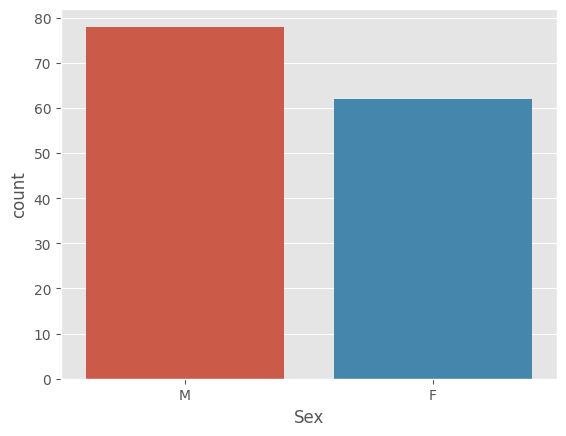

In [98]:
sns.countplot(x='Sex', data=athlete_result)

<Axes: xlabel='Result', ylabel='count'>

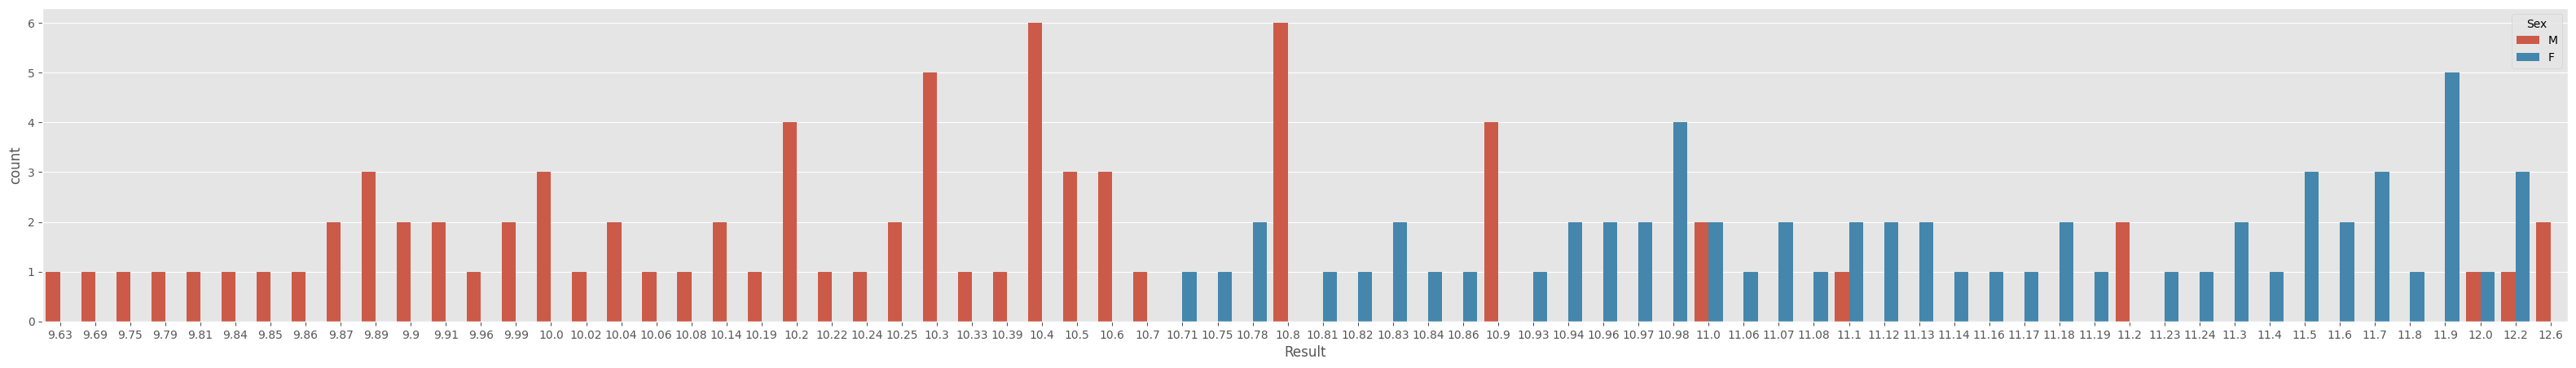

In [70]:
fig, ax = plt.subplots(figsize=(40, 5));  
sns.countplot(ax=ax, x='Result', hue = 'Sex', data=athlete_result)

## Modelando

In [71]:
from sklearn import preprocessing

In [86]:
df_athlete_result = athlete_result.copy()

In [87]:
df_athlete_result.info()
df_athlete_result.describe()
df_athlete_result.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 147
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Result  140 non-null    float64
 1   Sex     140 non-null    object 
 2   Age     140 non-null    float64
 3   Height  140 non-null    float64
 4   Weight  140 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


Result    0
Sex       0
Age       0
Height    0
Weight    0
dtype: int64

## Codificar variables

In [88]:
le = preprocessing.LabelEncoder()
le = le.fit(df_athlete_result["Sex"])
df_athlete_result['Sex'] = 1-le.transform(df_athlete_result['Sex'])

df_athlete_result = df_athlete_result.astype({'Result':'float'})

display(df_athlete_result)


,Result,Sex,Age,Height,Weight
0,9.81,0,29.0,196.0,95.0
1,9.89,0,34.0,186.0,80.0
2,9.91,0,21.0,176.0,70.0
3,9.69,0,21.0,196.0,95.0
4,9.89,0,23.0,188.0,80.0
...,...,...,...,...,...
143,12.20,1,21.0,165.0,51.0
144,12.20,1,23.0,172.0,57.0
145,11.90,1,21.0,174.0,60.0
146,11.90,1,21.0,159.0,48.0


## Train test split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
y = df_athlete_result.iloc[:, 0].values
X = df_athlete_result.iloc[:, 1:].values
validation_split = 0.20
seed = 707 #porque me gusta)))
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_split, random_state=seed)

## Modelo

In [91]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

preds = model.predict(X_validation)

In [94]:
print(preds)
print(y_validation)

[ 9.62871464 10.3216768  10.81103331 11.09066363 10.12715615 10.54375536
 11.06633319  9.95877755 11.44015594 10.56742156 11.18804363 10.35560226
 10.70983605 10.32451928 10.48947095 10.42625576 10.47691378 11.28740241
 10.61156638 11.28740241 10.52394097 10.22441648 11.61746533 11.13087686
 11.25464586 11.4407005   9.77292237 11.23323769]
[ 9.96  9.75 11.13 10.81  9.79 10.4  10.86 10.25 11.6  10.3  10.84 10.14
 10.9  10.2  10.02  9.86 10.2  11.12 10.2  11.18 10.5  10.14 11.9  11.18
 11.3  11.3   9.81 11.16]


In [95]:
model.score(X_validation,y_validation)

0.7844338420788154

## Pruebalo

In [85]:
edad = float(input("Introduce la edad: "))
sexo = float(input("Introduce el sexo: "))
peso = float(input("Introduce el peso: "))
altura = float(input("Introduce la altura: "))
deportista = [sexo, edad, altura , peso]
prediction = model.predict([deportista])
print(prediction)

[10.8314667]
